# _Paraphrasing detection model_


Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt




Loading the require dataset



In [2]:
df = pd.read_csv("train.csv")

Lets see how the first few cells looked like

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Preprocessing the dataset

Here, we are using the quora question pairs dataset to train, test and validate our model.

for that the first step is to preprocess the dataset to clean it, and make wothy to be used.

1. __Tokenization:__

In [4]:
df.fillna({'question1':''},inplace=True)
#df['question1'].fillna('', inplace=True)  # replace NaN with an empty string
df.fillna({'question1':''},inplace=True)
#df['question2'].fillna('', inplace=True)

def tokenize_text(text):
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha()]  # remove punctuation
    return tokens

df['question1_tokens'] = df.apply({'question1'},tokenize_text)
#df['question1_tokens'] = df['question1'].apply(tokenize_text)
df['question2_tokens'] = df.apply({'question2'},tokenize_text)
#df['question2_tokens'] = df['question2'].apply(tokenize_text)

print(df['question1_tokens'])
print(df['question2_tokens'])

ValueError: No axis named <function tokenize_text at 0x000002A6E23D1C60> for object type DataFrame

2. __Remove Stopwords__

In [9]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    tokens = [t for t in tokens if t not in stop_words]
    return tokens

df['question1_tokens'] = df['question1_tokens'].apply(remove_stopwords)
df['question2_tokens'] = df['question2_tokens'].apply(remove_stopwords)

print(df['question1_tokens'])
print(df['question2_tokens'])

0         [What, step, step, guide, invest, share, marke...
1                          [What, story, Kohinoor, Diamond]
2         [How, I, increase, speed, internet, connection...
3                 [Why, I, mentally, lonely, How, I, solve]
4         [Which, one, dissolve, water, quikly, sugar, s...
                                ...                        
404285    [How, many, keywords, Racket, programming, lan...
404286                           [Do, believe, life, death]
404287                                    [What, one, coin]
404288    [What, approx, annual, cost, living, studying,...
404289                            [What, like, sex, cousin]
Name: question1_tokens, Length: 404290, dtype: object
0          [What, step, step, guide, invest, share, market]
1         [What, would, happen, Indian, government, stol...
2           [How, Internet, speed, increased, hacking, DNS]
3                          [Find, remainder, math, divided]
4                [Which, fish, would, survive,

5. __Lemmatize the tokens__

In [10]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return tokens

df['question1_tokens'] = df['question1_tokens'].apply(lemmatize_tokens)
df['question2_tokens'] = df['question2_tokens'].apply(lemmatize_tokens)

print(df['question1_tokens'])
print(df['question2_tokens'])

0         [What, step, step, guide, invest, share, marke...
1                          [What, story, Kohinoor, Diamond]
2         [How, I, increase, speed, internet, connection...
3                 [Why, I, mentally, lonely, How, I, solve]
4         [Which, one, dissolve, water, quikly, sugar, s...
                                ...                        
404285    [How, many, keywords, Racket, programming, lan...
404286                           [Do, believe, life, death]
404287                                    [What, one, coin]
404288    [What, approx, annual, cost, living, studying,...
404289                            [What, like, sex, cousin]
Name: question1_tokens, Length: 404290, dtype: object
0          [What, step, step, guide, invest, share, market]
1         [What, would, happen, Indian, government, stol...
2           [How, Internet, speed, increased, hacking, DNS]
3                          [Find, remainder, math, divided]
4                [Which, fish, would, survive,

6. __Convert Tokens Back to Text__

In [12]:
def tokens_to_text(tokens):
    text = ' '.join(tokens)
    return text

df['question1'] = df['question1_tokens'].apply(tokens_to_text)
df['question2'] = df['question2_tokens'].apply(tokens_to_text)

print(df['question1'])
print(df['question2'])

0            What step step guide invest share market india
1                               What story Kohinoor Diamond
2         How I increase speed internet connection using...
3                         Why I mentally lonely How I solve
4         Which one dissolve water quikly sugar salt met...
                                ...                        
404285    How many keywords Racket programming language ...
404286                                Do believe life death
404287                                        What one coin
404288    What approx annual cost living studying UIC Ch...
404289                                 What like sex cousin
Name: question1, Length: 404290, dtype: object
0                  What step step guide invest share market
1         What would happen Indian government stole Kohi...
2                  How Internet speed increased hacking DNS
3                               Find remainder math divided
4                       Which fish would survive salt

 7. __Vectorize the text data using TF-IDF__

In [13]:
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df['question1'] + ' ' + df['question2'])
y = df['is_duplicate']

In [14]:
X

<404290x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3311415 stored elements in Compressed Sparse Row format>

In [15]:
y

0         0
1         0
2         0
3         0
4         0
         ..
404285    0
404286    1
404287    0
404288    0
404289    0
Name: is_duplicate, Length: 404290, dtype: int64

### Splitting the data

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Convert data into array

In [17]:
X_train = X_train.toarray()
X_val = X_val.toarray()
X_test = X_test.toarray()

In [19]:
print(X_train)
print(X_val)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
print(X_train.shape, y_train.shape)

(258745, 5000) (258745,)


# Building the model

Build a Baseline Model

1. Choose a model architecture: Select a suitable model architecture for paraphrase detection. 
    Thus we use Recurrent Neural Network (RNN)
    
2. Implement the model: Implement the chosen model architecture using a deep learning library like TensorFlow, Keras, or PyTorch.

3. Train the model: Train the model on the training set, monitoring the validation set performance to avoid overfitting.

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, concatenate, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['question1'] + df['question2'])

# Convert text data to sequences
sequences1 = tokenizer.texts_to_sequences(df['question1'])
sequences2 = tokenizer.texts_to_sequences(df['question2'])

# Calculate the maximum length of the sequences
max_length = max(len(x) for x in sequences1 + sequences2)

# Pad the sequences
padded_sequences1 = pad_sequences(sequences1, maxlen=max_length)
padded_sequences2 = pad_sequences(sequences2, maxlen=max_length)

# One-hot encode the labels
y_onehot = pd.get_dummies(y).values

# Split the data
from sklearn.model_selection import train_test_split

X_train1, X_test1, X_train2, X_test2, y_train, y_test = train_test_split(
    padded_sequences1, padded_sequences2, y_onehot, test_size=0.2, random_state=42)

# Create the model
input1 = Input(shape=(max_length,))
input2 = Input(shape=(max_length,))

x1 = Embedding(input_dim=5000, output_dim=128)(input1)
x1 = LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)(x1)

x2 = Embedding(input_dim=5000, output_dim=128)(input2)
x2 = LSTM(units=64, dropout=0.2, recurrent_dropout=0.2)(x2)

concat = concatenate([x1, x2])

output = Dense(2, activation='softmax')(concat)

model = Model(inputs=[input1, input2], outputs=output)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit([X_train1, X_train2], y_train, 
          validation_data=([X_test1, X_test2], y_test), 
          epochs=5, batch_size=32)

Epoch 1/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1038s 102ms/step - accuracy: 0.7239 - loss: 0.5509 - val_accuracy: 0.7506 - val_loss: 0.5101
Epoch 2/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1020s 101ms/step - accuracy: 0.7659 - loss: 0.4851 - val_accuracy: 0.7583 - val_loss: 0.4990
Epoch 3/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 1333s 132ms/step - accuracy: 0.7876 - loss: 0.4504 - val_accuracy: 0.7632 - val_loss: 0.4975
Epoch 4/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 2172s 215ms/step - accuracy: 0.8038 - loss: 0.4212 - val_accuracy: 0.7643 - val_loss: 0.5017
Epoch 5/5
10108/10108 ━━━━━━━━━━━━━━━━━━━━ 2159s 214ms/step - accuracy: 0.8184 - loss: 0.3963 - val_accuracy: 0.7624 - val_loss: 0.5092


### Evaluate and Refine the Model

+ Evaluate the model: Evaluate the model's performance on the testing set using metrics like accuracy, F1-score, precision, recall, and AUC-ROC.

#### Evaluation:-

1. Confusion Matrix: Let's take a look at the confusion matrix to see how the model is performing on each class.

    This will give us an idea of how many true positives, false positives, true negatives, and false negatives the model is producing.

In [24]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict([X_test1, X_test2])
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

conf_mat = confusion_matrix(y_test_class, y_pred_class)
print(conf_mat)

2527/2527 ━━━━━━━━━━━━━━━━━━━━ 151s 59ms/step
[[43077  7726]
 [11485 18570]]


2. ROC-AUC Curve: Let's plot the ROC-AUC curve to see how well the model is separating the classes.
                This will give us an idea of how well the model is performing in terms of true positive rate and false positive rate.

2527/2527 ━━━━━━━━━━━━━━━━━━━━ 147s 58ms/step


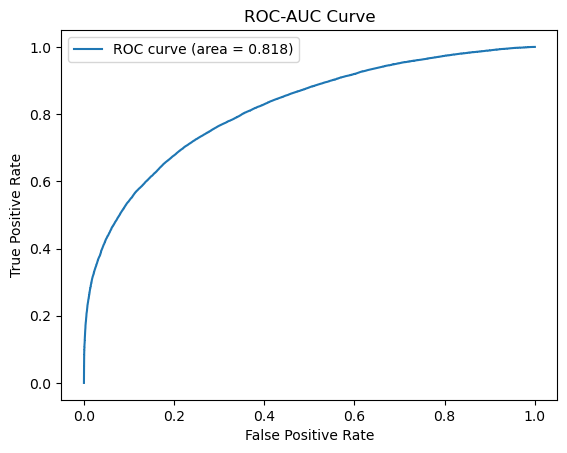

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_proba = model.predict([X_test1, X_test2])[:, 1]
fpr, tpr, _ = roc_curve(y_test_class, y_pred_proba)
auc = roc_auc_score(y_test_class, y_pred_proba)

plt.plot(fpr, tpr, label='ROC curve (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

#### Improvement:-
1. Hyperparameter Tuning: Let's try tuning some hyperparameters to see if we can improve the model's performance. We can use a grid search or random search to find the optimal hyperparameters.

In [29]:
from sklearn.model_selection import GridSearchCV

y = y.values.reshape(-1, 1)
param_grid = {
    'batch_size': [32, 64, 128],
    'epochs': [5, 10, 15],
    'dropout': [0.1, 0.2, 0.3],
    'ecurrent_dropout': [0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit([X_train1, X_train2], y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

ValueError: Found input variables with inconsistent numbers of samples: [2, 323432]

In [31]:
print(X.shape, y.shape)

(404290, 5000) (404290, 1)
